Household_power_consumption

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
file_path = "C:\\Users\\Dell\\Downloads\\individual+household+electric+power+consumption.zip"
import pandas as pd
# Read the text file as CSV with semicolon separator
dataset= pd.read_csv(file_path, sep=';')  
dataset.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [3]:
df=pd.DataFrame(dataset)     #type:ignore
df.head()    

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [4]:
df.info()   #type:ignore

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


In [5]:
df.isnull().sum() # type: ignore

Date                         0
Time                         0
Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64

In [6]:
df.dropna(inplace=True)  

In [7]:
df["Datetime"] = pd.to_datetime(df["Date"] + " " + df["Time"]) #type:ignore
df.drop(["Date","Time"],axis=1,inplace=True) #type:ignore


In [8]:
df.head() #type:ignore

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime
0,4.216,0.418,234.840,18.400,0.000,1.000,17.0,2006-12-16 17:24:00
1,5.360,0.436,233.630,23.000,0.000,1.000,16.0,2006-12-16 17:25:00
2,5.374,0.498,233.290,23.000,0.000,2.000,17.0,2006-12-16 17:26:00
3,5.388,0.502,233.740,23.000,0.000,1.000,17.0,2006-12-16 17:27:00
4,3.666,0.528,235.680,15.800,0.000,1.000,17.0,2006-12-16 17:28:00


In [9]:
df["Global_active_power"].unique()

array(['4.216', '5.360', '5.374', ..., 4.068, 3.94, 3.74],
      shape=(6533,), dtype=object)

In [10]:
df["Global_reactive_power"].unique()  #type:ignore

array(['0.418', '0.436', '0.498', '0.502', '0.528', '0.522', '0.520',
       '0.510', '0.470', '0.478', '0.398', '0.422', '0.282', '0.152',
       '0.156', '0.000', '0.076', '0.090', '0.200', '0.058', '0.180',
       '0.144', '0.118', '0.108', '0.202', '0.192', '0.186', '0.116',
       '0.136', '0.148', '0.160', '0.158', '0.100', '0.082', '0.050',
       '0.052', '0.162', '0.086', '0.048', '0.054', '0.068', '0.166',
       '0.174', '0.178', '0.188', '0.088', '0.080', '0.070', '0.084',
       '0.074', '0.106', '0.092', '0.064', '0.046', '0.138', '0.134',
       '0.132', '0.120', '0.130', '0.154', '0.078', '0.142', '0.140',
       '0.146', '0.150', '0.170', '0.102', '0.072', '0.060', '0.056',
       '0.062', '0.112', '0.066', '0.172', '0.168', '0.194', '0.184',
       '0.096', '0.164', '0.182', '0.094', '0.098', '0.176', '0.190',
       '0.204', '0.220', '0.198', '0.208', '0.244', '0.334', '0.298',
       '0.296', '0.286', '0.278', '0.104', '0.258', '0.238', '0.256',
       '0.214', '0.2

In [11]:
df["Voltage"].unique() #type:ignore

array(['234.840', '233.630', '233.290', ..., 228.57, 229.09, 230.31],
      shape=(5167,), dtype=object)

In [12]:
df["Global_intensity"].unique() #type:ignore

array(['18.400', '23.000', '15.800', '15.000', '19.600', '23.200',
       '22.400', '22.600', '17.600', '14.200', '13.800', '14.400',
       '16.400', '25.400', '33.200', '30.600', '22.000', '19.400',
       '13.600', '13.400', '11.600', '19.200', '10.400', '11.800',
       '11.000', '21.000', '26.200', '29.000', '27.800', '27.000',
       '19.000', '9.600', '10.000', '21.400', '17.800', '12.000',
       '12.400', '15.200', '20.800', '15.600', '26.400', '18.800',
       '13.000', '9.800', '9.200', '13.200', '18.000', '10.800', '10.600',
       '18.200', '17.000', '17.400', '14.800', '14.600', '15.400',
       '14.000', '8.400', '9.400', '7.800', '8.200', '8.600', '11.400',
       '12.600', '9.000', '7.600', '12.800', '7.400', '5.600', '4.600',
       '7.200', '1.600', '2.400', '2.800', '1.200', '4.400', '4.000',
       '10.200', '6.800', '5.200', '6.000', '6.600', '8.000', '2.000',
       '4.800', '5.400', '16.600', '3.000', '1.800', '8.800', '1.400',
       '21.800', '20.200', '16.000

In [13]:
df["Sub_metering_1"].unique()  #type:ignore

array(['0.000', '1.000', '2.000', '6.000', '37.000', '36.000', '38.000',
       '25.000', '12.000', '11.000', '9.000', '4.000', '33.000', '5.000',
       '34.000', '8.000', '26.000', '27.000', '15.000', '20.000',
       '21.000', '23.000', '16.000', '10.000', '39.000', '32.000',
       '19.000', '35.000', '30.000', '40.000', '7.000', '31.000',
       '17.000', '3.000', '29.000', '24.000', '14.000', '41.000',
       '53.000', '76.000', '75.000', '77.000', '74.000', '28.000',
       '68.000', '58.000', '62.000', '13.000', '18.000', '22.000',
       '64.000', '71.000', '56.000', '72.000', '45.000', '42.000',
       '59.000', '66.000', '43.000', '44.000', '48.000', '46.000',
       '73.000', '55.000', '60.000', '70.000', '63.000', '67.000',
       '47.000', '65.000', '51.000', '50.000', '69.000', '78.000',
       '57.000', '49.000', '61.000', '52.000', '54.000', '79.000',
       '80.000', '81.000', '82.000', '83.000', '84.000', '88.000',
       '86.000', '87.000', 0.0, 1.0, 2.0, 40.0, 39.0

In [14]:
df["Sub_metering_2"].unique()  #type:ignore

array(['1.000', '2.000', '0.000', '16.000', '37.000', '36.000', '22.000',
       '12.000', '27.000', '20.000', '9.000', '4.000', '3.000', '5.000',
       '13.000', '35.000', '28.000', '26.000', '24.000', '21.000',
       '17.000', '33.000', '25.000', '23.000', '18.000', '30.000',
       '31.000', '7.000', '38.000', '29.000', '50.000', '71.000',
       '59.000', '62.000', '70.000', '40.000', '34.000', '8.000',
       '15.000', '6.000', '32.000', '19.000', '14.000', '49.000',
       '72.000', '73.000', '61.000', '39.000', '42.000', '10.000',
       '56.000', '11.000', '43.000', '67.000', '63.000', '53.000',
       '65.000', '52.000', '69.000', '48.000', '74.000', '41.000',
       '47.000', '58.000', '68.000', '64.000', '75.000', '46.000',
       '57.000', '60.000', '66.000', '44.000', '78.000', '77.000',
       '76.000', '51.000', '55.000', '45.000', '54.000', '79.000',
       '80.000', 0.0, 1.0, 2.0, 36.0, 40.0, 39.0, 41.0, 23.0, 10.0, 6.0,
       5.0, 18.0, 37.0, 28.0, 38.0, 9.0, 13.0,

In [15]:
df["Sub_metering_3"].unique()  #type:ignore

array([17., 16., 18.,  9.,  0.,  5., 19., 10., 20.,  8.,  4.,  2.,  3.,
       11., 13.,  6., 15., 12.,  1., 14.,  7., 23., 25., 26., 28., 27.,
       21., 22., 29., 24., 30., 31.])

In [16]:
col1=['Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2']
for i in col1:
    df[i]=df[i].astype("float64") #type:ignore

In [17]:
df.info() #type:ignore

<class 'pandas.core.frame.DataFrame'>
Index: 2049280 entries, 0 to 2075258
Data columns (total 8 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Global_active_power    float64       
 1   Global_reactive_power  float64       
 2   Voltage                float64       
 3   Global_intensity       float64       
 4   Sub_metering_1         float64       
 5   Sub_metering_2         float64       
 6   Sub_metering_3         float64       
 7   Datetime               datetime64[ns]
dtypes: datetime64[ns](1), float64(7)
memory usage: 140.7 MB


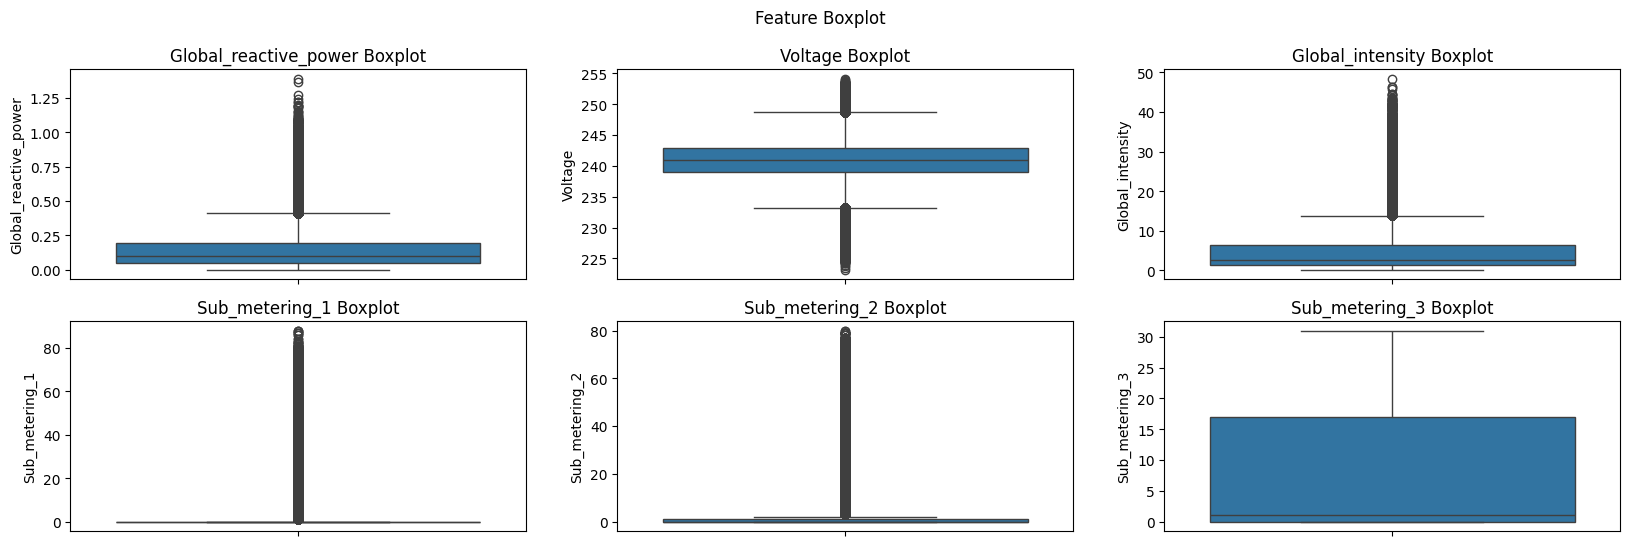

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
fig,ax=plt.subplots(2,3,figsize=(20,6)) #type:ignore

features=['Global_reactive_power','Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2','Sub_metering_3']
for index,feature in enumerate(features):
    row=index//3
    col=index%3
    sns.boxplot(df[feature],ax=ax[row,col]) #type:ignore
    ax[row,col].set_title("{} Boxplot".format(feature))
plt.suptitle("Feature Boxplot") #type:ignore
plt.show() #type:ignore

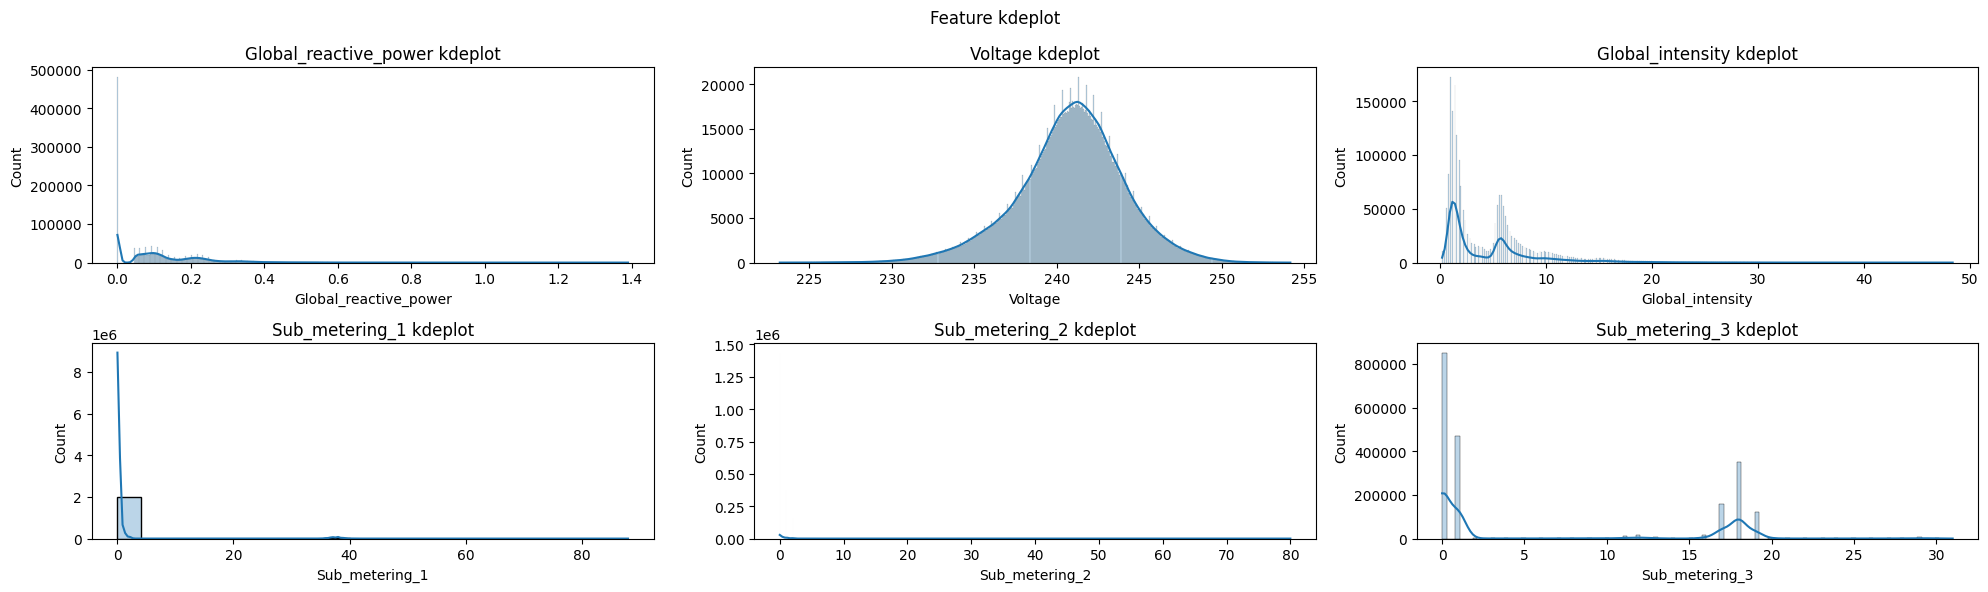

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
fig,ax=plt.subplots(2,3,figsize=(20,6)) 

features=['Global_reactive_power','Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2','Sub_metering_3']
for index,feature in enumerate(features):
    row=index//3
    col=index%3
    sns.histplot(df[feature],ax=ax[row,col],kde=True,alpha=0.3) #type:ignore
    ax[row,col].set_title("{} kdeplot".format(feature))
plt.suptitle("Feature kdeplot") #type:ignore
plt.tight_layout() #type:ignore
plt.show() #type:ignore

In [20]:
corr=df.corr() #type:ignore
corr

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime
Global_active_power,1.000000,0.247017,-0.399762,0.998889,0.484401,0.434569,0.638555,-0.041838
Global_reactive_power,0.247017,1.000000,-0.112246,0.266120,0.123111,0.139231,0.089617,0.053472
Voltage,-0.399762,-0.112246,1.000000,-0.411363,-0.195976,-0.167405,-0.268172,0.249370
Global_intensity,0.998889,0.266120,-0.411363,1.000000,0.489298,0.440347,0.626543,-0.045805
Sub_metering_1,0.484401,0.123111,-0.195976,0.489298,1.000000,0.054721,0.102571,-0.014364
Sub_metering_2,0.434569,0.139231,-0.167405,0.440347,0.054721,1.000000,0.080872,-0.037956
Sub_metering_3,0.638555,0.089617,-0.268172,0.626543,0.102571,0.080872,1.000000,0.054291
Datetime,-0.041838,0.053472,0.249370,-0.045805,-0.014364,-0.037956,0.054291,1.000000


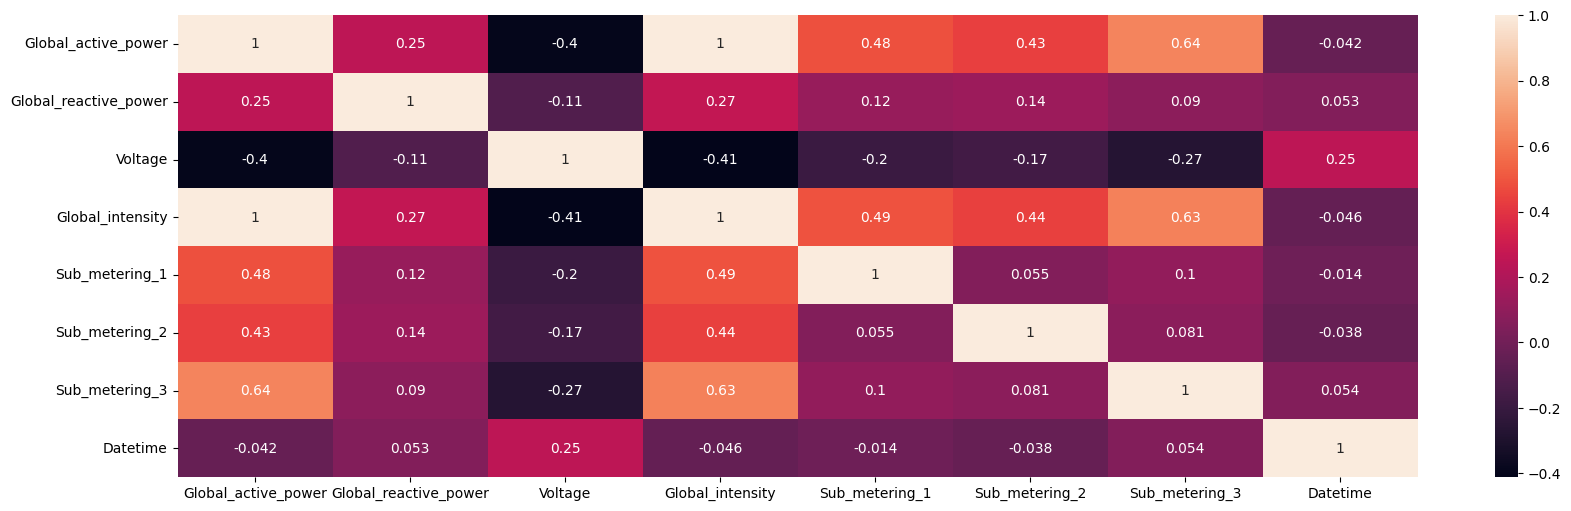

In [21]:
plt.figure(figsize=(20,6)) #type:ignore
sns.heatmap(corr,annot=True) #type:ignore
plt.show() #type:ignore

In [22]:
df["Year"]=pd.DatetimeIndex(df["Datetime"]).year #type:ignore
df["Month"]=pd.DatetimeIndex(df["Datetime"]).month #type:ignore
df["Day"]=pd.DatetimeIndex(df["Datetime"]).day #type:ignore 
df["Weekday"]=pd.DatetimeIndex(df["Datetime"]).weekday #type:ignore
df["Hour"]=pd.DatetimeIndex(df["Datetime"]).hour #type:ignore
df.head() #type:ignore

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime,Year,Month,Day,Weekday,Hour
0,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006-12-16 17:24:00,2006,12,16,5,17
1,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006-12-16 17:25:00,2006,12,16,5,17
2,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006-12-16 17:26:00,2006,12,16,5,17
3,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006-12-16 17:27:00,2006,12,16,5,17
4,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006-12-16 17:28:00,2006,12,16,5,17


In [23]:
df["Weekend"]=df["Weekday"].isin([5,6]) #type:ignore
map={True:1,False:0} #type:ignore
df["Weekend"]=df["Weekend"].map(map) #type:ignore
df.head() #type:ignore

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime,Year,Month,Day,Weekday,Hour,Weekend
0,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006-12-16 17:24:00,2006,12,16,5,17,1
1,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006-12-16 17:25:00,2006,12,16,5,17,1
2,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006-12-16 17:26:00,2006,12,16,5,17,1
3,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006-12-16 17:27:00,2006,12,16,5,17,1
4,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006-12-16 17:28:00,2006,12,16,5,17,1


In [24]:
week_data_max=df.groupby("Weekday")["Global_active_power"].max().sort_values().reset_index() #type:ignore
week_data_max #type:ignore
map={0:"Mon",1:"Tues",2:"Wed",3:"Thurs",4:"Fri",5:"Sat",6:"Sun"} #type:ignore
week_data_max["Weekday"]=week_data_max["Weekday"].map(map) #type:ignore
week_data_max #type:ignore

,Weekday,Global_active_power
0,Wed,8.974
1,Thurs,9.410
2,Mon,9.486
3,Fri,9.590
4,Sat,9.724
5,Tues,9.732
6,Sun,11.122


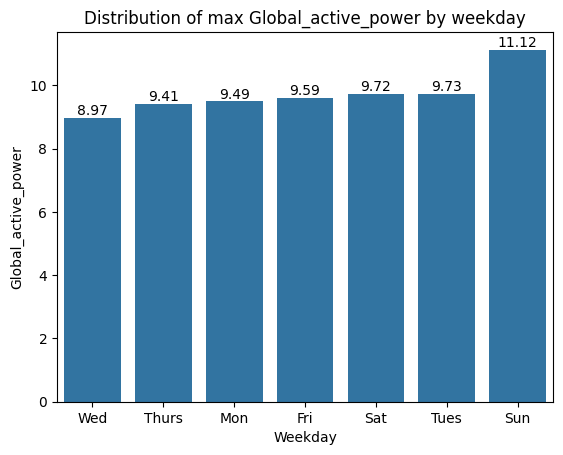

Maximum Global_active_power on 6th day of week with 11.122 KW.


In [25]:
bar=sns.barplot(x="Weekday",y="Global_active_power",data=week_data_max) #type:ignore
for i in bar.patches:
    height=i.get_height()
    plt.text(i.get_x()+i.get_width()/2,height,f"{round(height,2)}",ha="center",va="bottom") #type:ignore
plt.title("Distribution of max Global_active_power by weekday") #type:ignore
plt.show() #type:ignore
print(f"Maximum Global_active_power on {df.groupby("Weekday")["Global_active_power"].max().sort_values().index[6]}th day of week with {df.groupby("Weekday")["Global_active_power"].max().sort_values()[6]} KW.")

In [26]:
week_data_mean=df.groupby("Weekday")["Global_active_power"].mean().sort_values().reset_index() #type:ignore
week_data_mean 
map={0:"Mon",1:"Tues",2:"Wed",3:"Thurs",4:"Fri",5:"Sat",6:"Sun"}
week_data_mean["Weekday"]=week_data_mean["Weekday"].map(map)
week_data_mean

,Weekday,Global_active_power
0,Thurs,0.981809
1,Mon,0.999546
2,Fri,1.043394
3,Tues,1.069796
4,Wed,1.082588
5,Sun,1.220188
6,Sat,1.248335


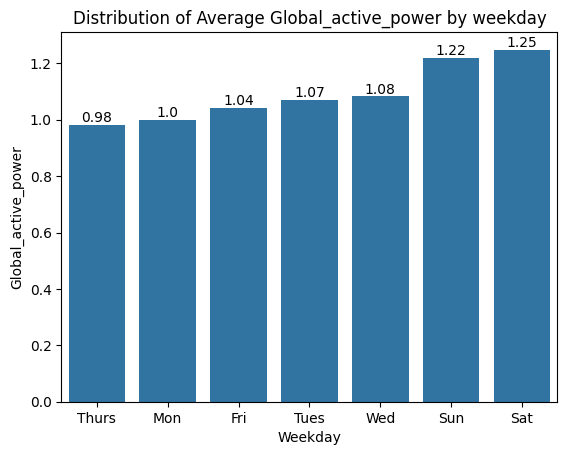

Maximum Global_active_power on 5th day of week with 1.2201878570763613 KW.


In [27]:
bar=sns.barplot(x="Weekday",y="Global_active_power",data=week_data_mean) # type: ignore
for i in bar.patches:
    height=i.get_height()
    plt.text(i.get_x()+i.get_width()/2,height,f"{round(height,2)}",ha="center",va="bottom") #type:ignore
plt.title("Distribution of Average Global_active_power by weekday") #type:ignore
plt.show() #type:ignore
print(f"Maximum Global_active_power on {df.groupby("Weekday")["Global_active_power"].mean().sort_values().index[6]}th day of week with {df.groupby("Weekday")["Global_active_power"].mean().sort_values()[6]} KW.")

In [28]:
year_data=df.groupby("Year")["Global_active_power"].mean().reset_index() #type:ignore
year_data

,Year,Global_active_power
0,2006,1.901295
1,2007,1.117008
2,2008,1.072097
3,2009,1.078637
4,2010,1.061000


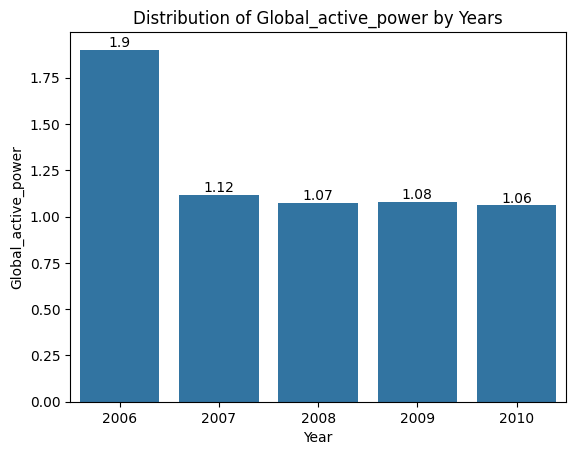

Average Global_active_power in year: 2006 with 1.9 kW


In [29]:
bar=sns.barplot(x="Year",y="Global_active_power",data=year_data)
for i in bar.patches:
    height=i.get_height()
    plt.text(i.get_x()+i.get_width()/2,height,f"{round(height,2)}",ha="center",va="bottom")
plt.title("Distribution of Global_active_power by Years")
plt.show()
print(f"Average Global_active_power in year: {df.groupby('Year')['Global_active_power'].mean().index[0]} with 1.9 kW")


In [30]:
month_data=df.groupby("Month")["Global_active_power"].mean().sort_values(ascending=False).reset_index()
month_data

,Month,Global_active_power
0,12,1.489729
1,1,1.462226
2,2,1.300431
3,11,1.291532
4,3,1.231343
5,10,1.137141
6,4,1.047146
7,5,1.029571
8,9,0.975653
9,6,0.909148


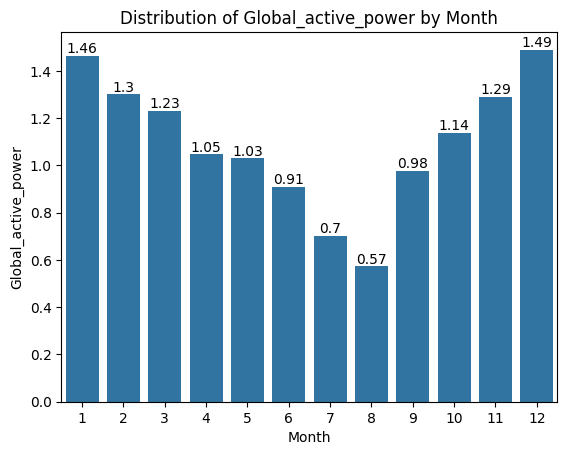

In [31]:
bar=sns.barplot(x="Month",y="Global_active_power",data=month_data) #type:ignore
for i in bar.patches:
    height=i.get_height()
    plt.text(i.get_x()+i.get_width()/2,height,f"{round(height,2)}",ha="center",va="bottom") #type:ignore
plt.title("Distribution of Global_active_power by Month") #type:ignore
plt.show() #type:ignore
print(f"")

In [32]:
df.set_index("Datetime",inplace=True) #type:ignore

In [33]:
df["Daily_Avg_Power"]=df["Global_active_power"].resample("D").transform("mean") #type:ignore
df.head() #type:ignore

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Year,Month,Day,Weekday,Hour,Weekend,Daily_Avg_Power
Datetime,,,,,,,,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006,12,16,5,17,1,3.053475
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006,12,16,5,17,1,3.053475
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006,12,16,5,17,1,3.053475
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006,12,16,5,17,1,3.053475
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006,12,16,5,17,1,3.053475


In [34]:
peak_hours=df.groupby("Hour")["Global_active_power"].mean().reset_index() #type:ignore
peak_hours.sort_values(by="Global_active_power",ascending=False).head(3)

,Hour,Global_active_power
20,20,1.899064
21,21,1.877697
19,19,1.733335


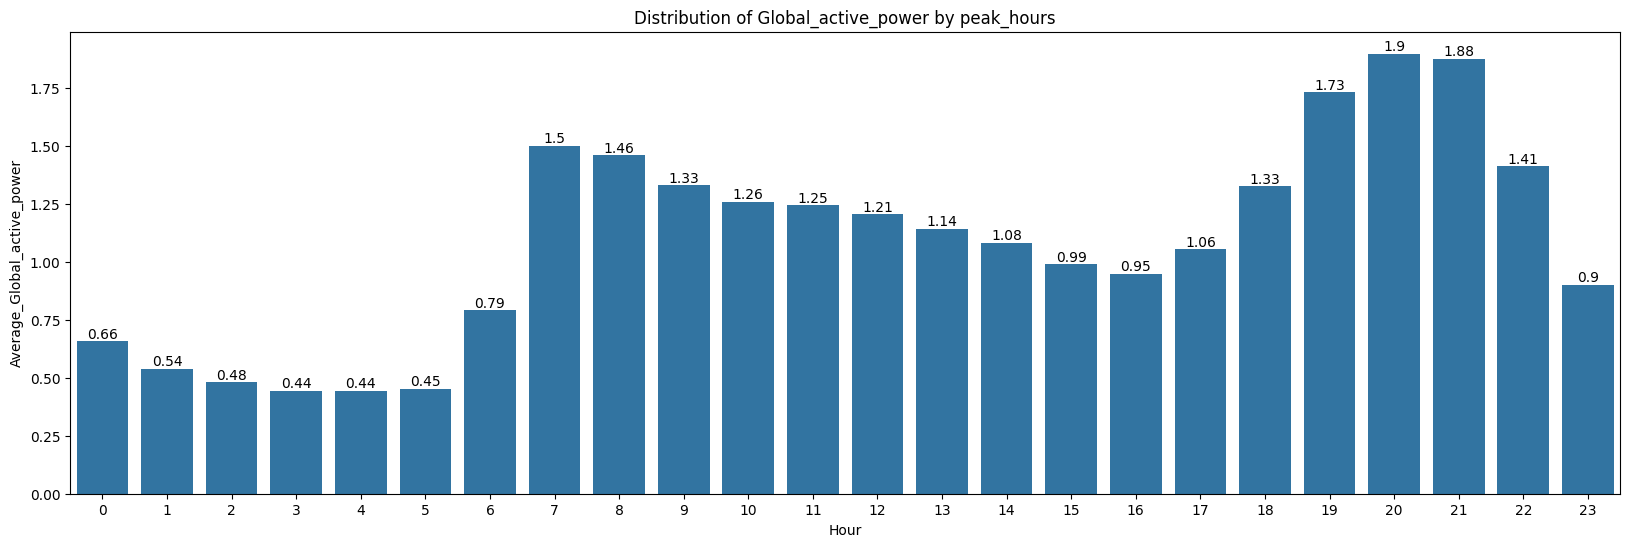

Peak Global Active Power Hours: 20,21,19 hours


In [35]:
plt.figure(figsize=(20,6)) #type:ignore
bar=sns.barplot(x="Hour",y="Global_active_power",data=peak_hours) #type:ignore
for i in bar.patches:
    height=i.get_height()
    plt.text(i.get_x()+i.get_width()/2,height,f"{round(height,2)}",ha="center",va="bottom") #type:ignore
plt.ylabel("Average_Global_active_power") #type:ignore
plt.title("Distribution of Global_active_power by peak_hours") #type:ignore
plt.show() #type:ignore
print(f"Peak Global Active Power Hours: {df.groupby("Hour")["Global_active_power"].mean().sort_values(ascending=False).index[0]},{df.groupby("Hour")["Global_active_power"].mean().sort_values(ascending=False).index[1]},{df.groupby("Hour")["Global_active_power"].mean().sort_values(ascending=False).index[2]} hours") #type:igmore

In [36]:
peak_hours_1=peak_hours.sort_values(by="Global_active_power",ascending=False).head(3).index.tolist() #type:ignore
print(peak_hours_1)
df["is_peak_hour"]=df["Hour"].isin([19,20,21]) #type:ignore
map={True:0,False:1}
df["is_peak_hour"]=df["is_peak_hour"].map(map) #type:ignore
df.head() #type:ignore


[20, 21, 19]


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Year,Month,Day,Weekday,Hour,Weekend,Daily_Avg_Power,is_peak_hour
Datetime,,,,,,,,,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006,12,16,5,17,1,3.053475,1
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006,12,16,5,17,1,3.053475,1
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006,12,16,5,17,1,3.053475,1
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006,12,16,5,17,1,3.053475,1
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006,12,16,5,17,1,3.053475,1


In [37]:
peak_hours_2=peak_hours.sort_values(by="Global_active_power",ascending=True).head(3).index.tolist()
print(peak_hours_2)
df["is_off_peak_hour"]=df["Hour"].isin([3,4,5])
map={False:0,True:1}
df["is_off_peak_hour"]=df["is_off_peak_hour"].map(map)
df.head()


[4, 3, 5]


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Year,Month,Day,Weekday,Hour,Weekend,Daily_Avg_Power,is_peak_hour,is_off_peak_hour
Datetime,,,,,,,,,,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006,12,16,5,17,1,3.053475,1,0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006,12,16,5,17,1,3.053475,1,0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006,12,16,5,17,1,3.053475,1,0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006,12,16,5,17,1,3.053475,1,0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006,12,16,5,17,1,3.053475,1,0


In [38]:
df["Sub_metering_1"].value_counts()

Sub_metering_1
0.0     1880175
1.0       84936
2.0       19017
38.0      16119
37.0      14892
         ...   
82.0          3
88.0          3
87.0          3
84.0          2
86.0          2
Name: count, Length: 88, dtype: int64

In [39]:
df['rolling_avg_1hr'] = df['Global_active_power'].rolling('1H').mean()
df.tail()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Year,Month,Day,Weekday,Hour,Weekend,Daily_Avg_Power,is_peak_hour,is_off_peak_hour,rolling_avg_1hr
Datetime,,,,,,,,,,,,,,,,,
2010-11-26 20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0,2010,11,26,4,20,0,1.17823,0,0,1.173367
2010-11-26 20:59:00,0.944,0.0,240.00,4.0,0.0,0.0,0.0,2010,11,26,4,20,0,1.17823,0,0,1.163700
2010-11-26 21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0,2010,11,26,4,21,0,1.17823,0,0,1.155067
2010-11-26 21:01:00,0.934,0.0,239.70,3.8,0.0,0.0,0.0,2010,11,26,4,21,0,1.17823,0,0,1.144733
2010-11-26 21:02:00,0.932,0.0,239.55,3.8,0.0,0.0,0.0,2010,11,26,4,21,0,1.17823,0,0,1.133667


In [40]:
df.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3', 'Year', 'Month', 'Day', 'Weekday', 'Hour', 'Weekend',
       'Daily_Avg_Power', 'is_peak_hour', 'is_off_peak_hour',
       'rolling_avg_1hr'],
      dtype='object')

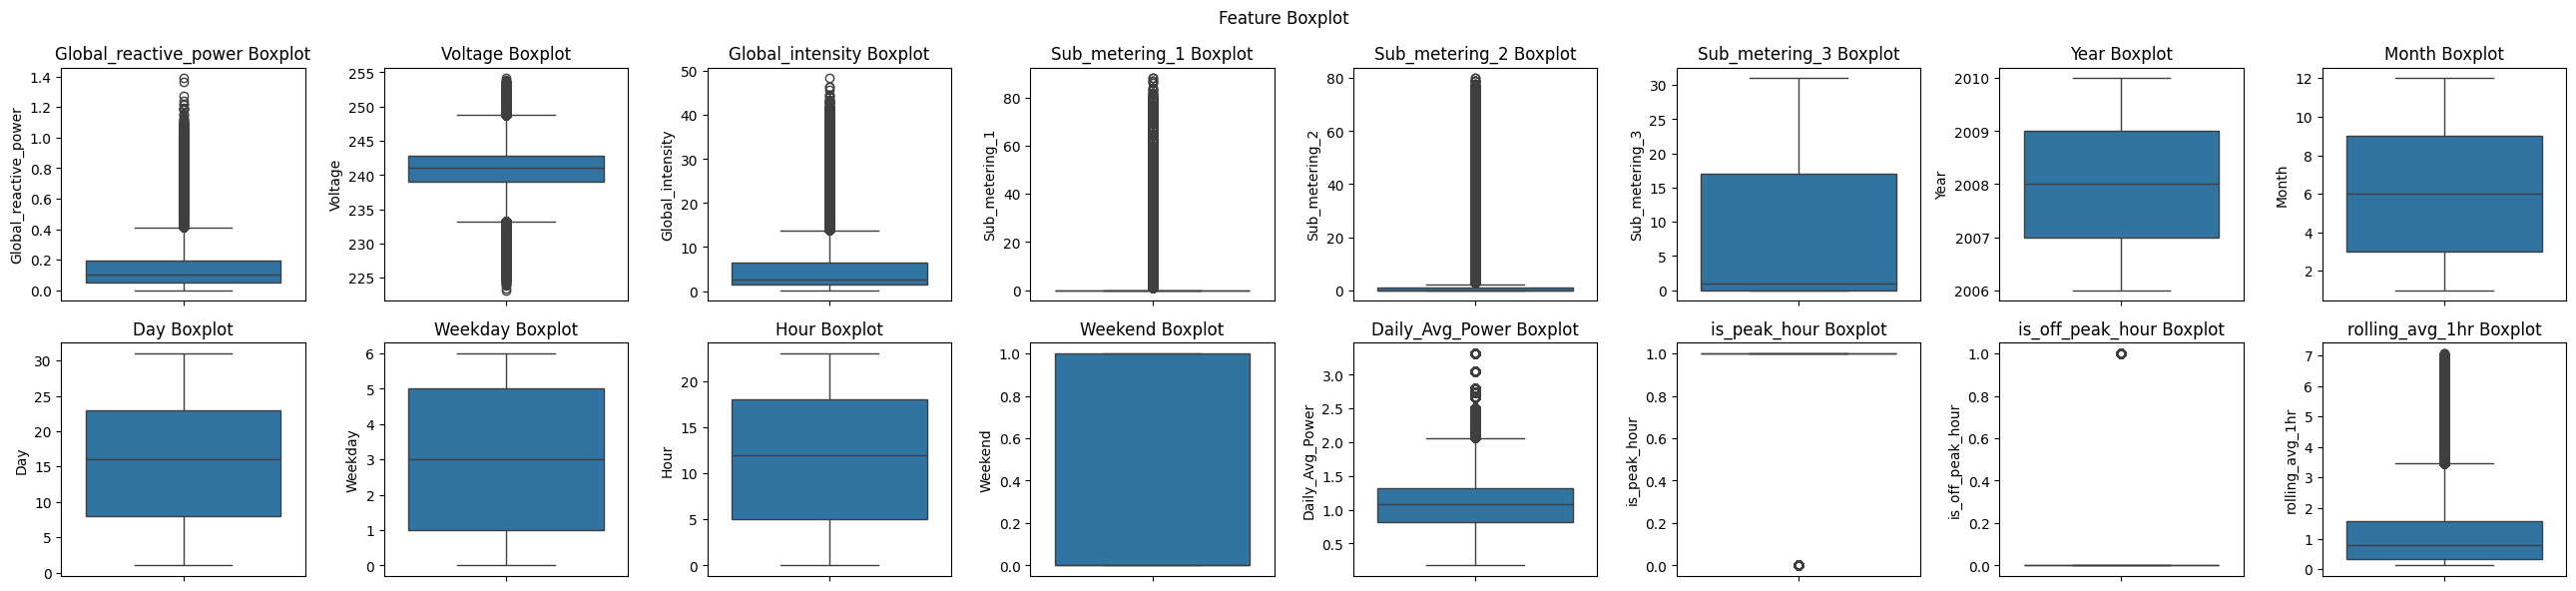

In [41]:
fig,ax=plt.subplots(2,8,figsize=(26,6))
features=['Global_reactive_power','Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2','Sub_metering_3','Year', 'Month', 'Day', 'Weekday', 'Hour', 'Weekend',
       'Daily_Avg_Power', 'is_peak_hour', 'is_off_peak_hour',
       'rolling_avg_1hr']
for index,feature in enumerate(features):
    row=index//8
    col=index%8
    sns.boxplot(df[feature],ax=ax[row,col])
    ax[row,col].set_title("{} Boxplot".format(feature))
plt.suptitle("Feature Boxplot")
plt.tight_layout()
plt.show()

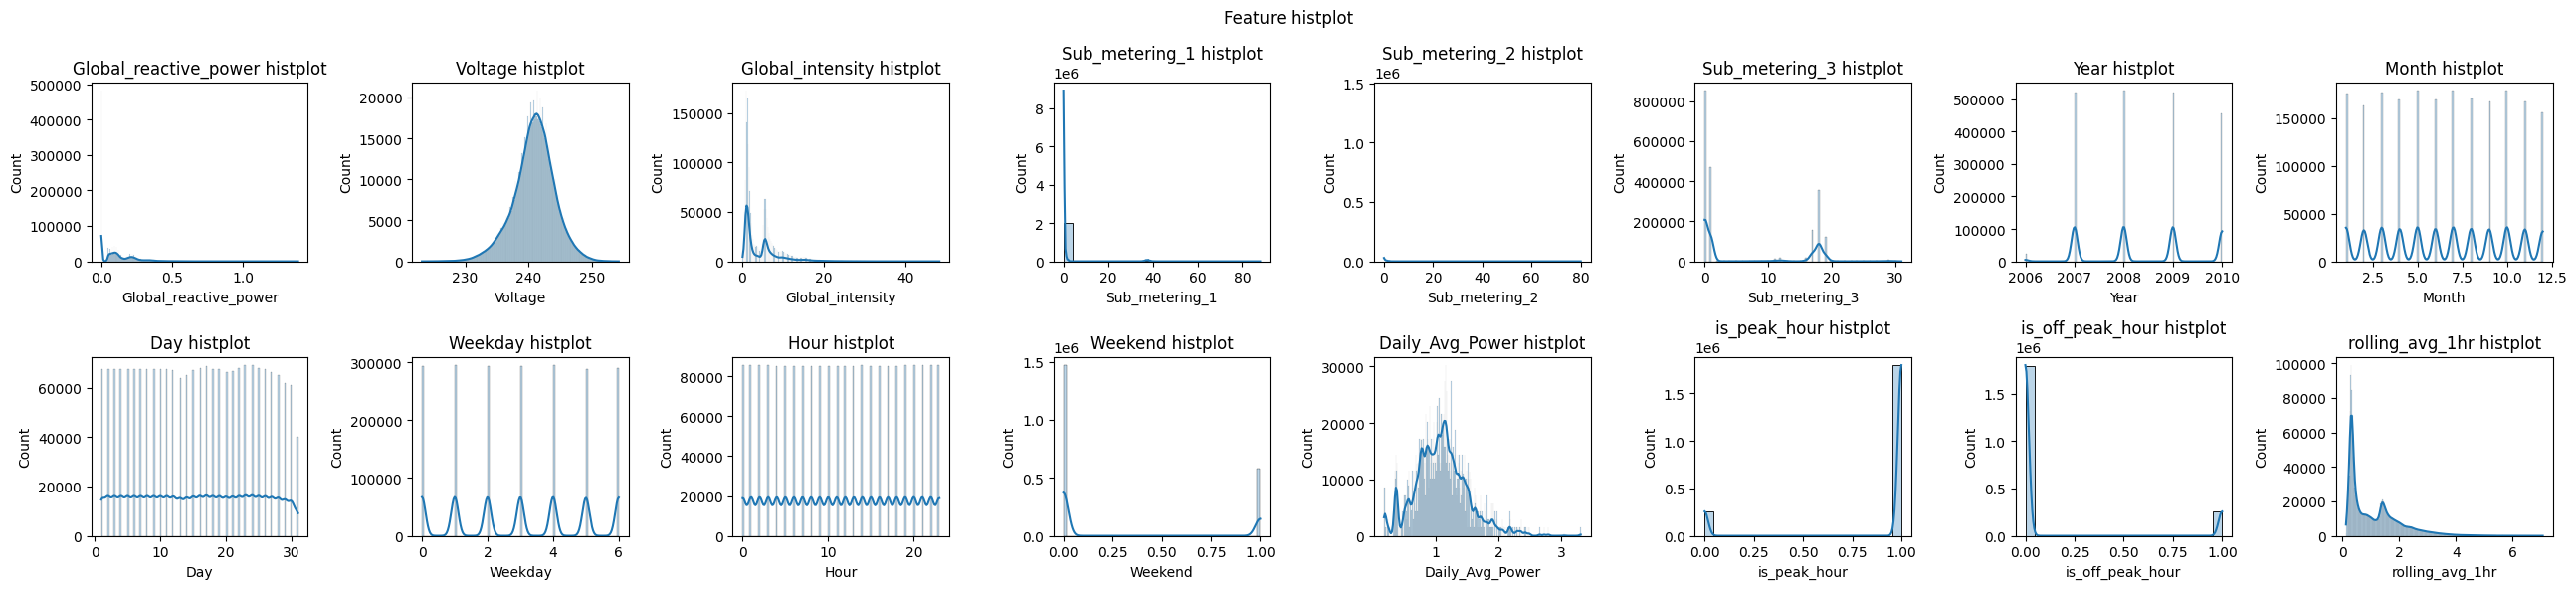

In [42]:
fig,ax=plt.subplots(2,8,figsize=(26,6))
features=['Global_reactive_power','Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2','Sub_metering_3','Year', 'Month', 'Day', 'Weekday', 'Hour', 'Weekend',
       'Daily_Avg_Power','is_peak_hour', 'is_off_peak_hour','rolling_avg_1hr']
for index,feature in enumerate(features):
    row=index//8
    col=index%8
    sns.histplot(df[feature],ax=ax[row,col],kde=True,alpha=0.3)
    ax[row,col].set_title("{} histplot".format(feature))
plt.suptitle("Feature histplot")
plt.tight_layout()
plt.show()

In [42]:

col1=['Global_reactive_power','Voltage', 'Global_intensity', 'Sub_metering_2','Sub_metering_3',
       'Daily_Avg_Power','rolling_avg_1hr']
def cap_outliers(series):
    Q1=series.quantile(0.25)
    Q3=series.quantile(0.75)
    IQR=Q3-Q1
    min_value=Q1-1.5*IQR
    max_value=Q3+1.5*IQR
    return series.apply(lambda x:max_value if x>max_value else (min_value if x<min_value else x))

for i in col1:
    df[i]=cap_outliers(df[i]) #type:ignore
    

In [43]:
def cap_outlier(series):
    min_value=series.quantile(0.05)
    max_value=series.quantile(0.95)
    return series.apply(lambda x:min_value if x<min_value else(max_value if x>max_value else x))

df["Sub_metering_1"]=cap_outlier(df['Sub_metering_1']) #type:ignore

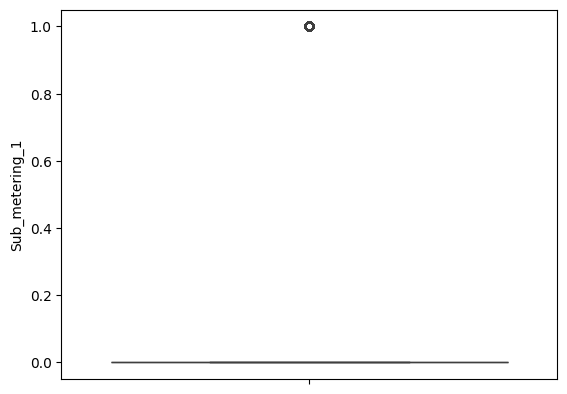

In [44]:
sns.boxplot(df["Sub_metering_1"]) #type:ignore
plt.show() #type:ignore

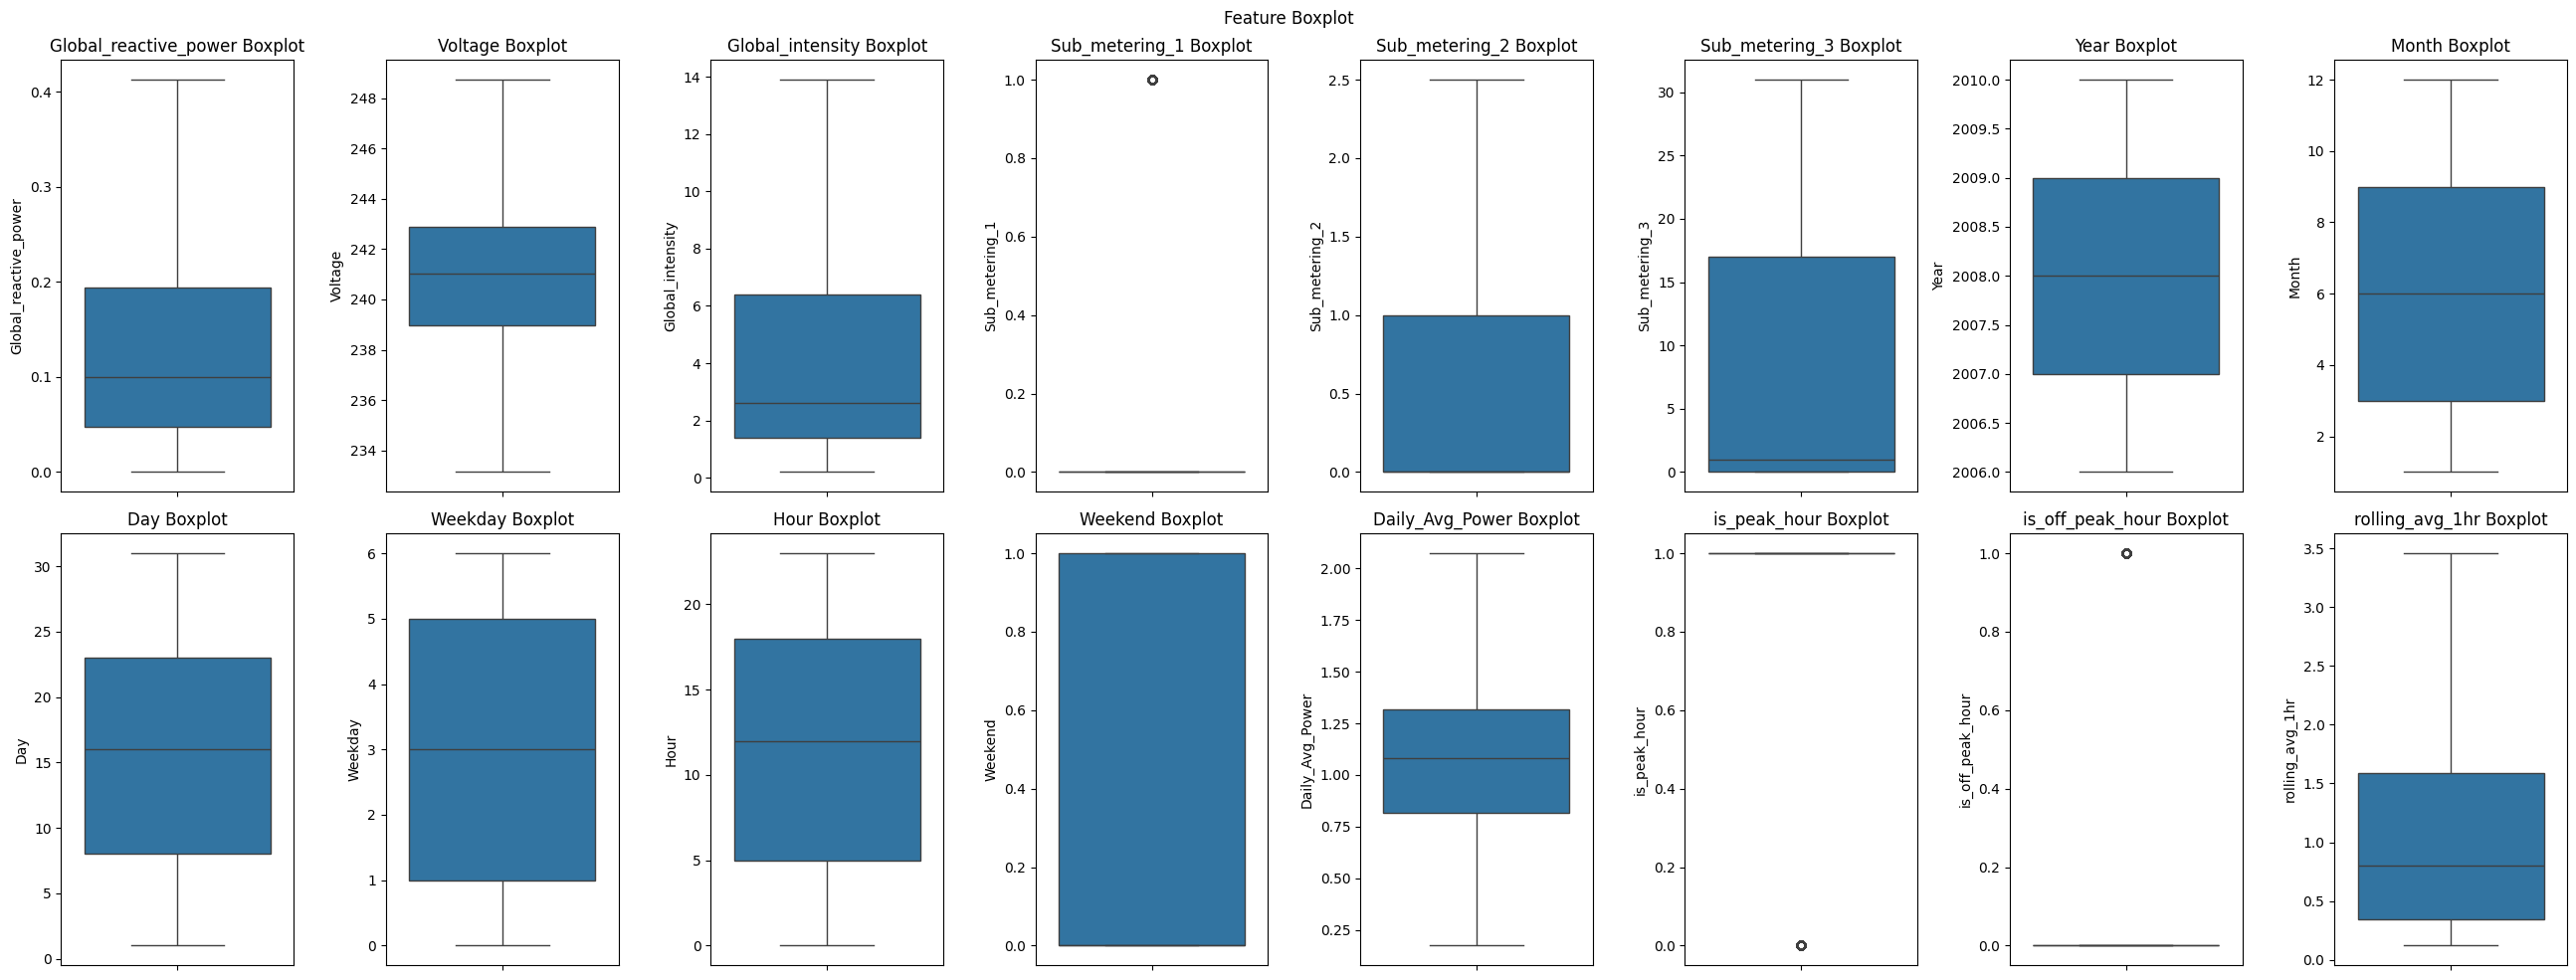

In [45]:
fig,ax=plt.subplots(2,8,figsize=(26,10))  #type:ignore
features=['Global_reactive_power','Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2','Sub_metering_3','Year', 'Month', 'Day', 'Weekday', 'Hour', 'Weekend',
       'Daily_Avg_Power', 'is_peak_hour', 'is_off_peak_hour',
       'rolling_avg_1hr']
for index,feature in enumerate(features):
    row=index//8
    col=index%8
    sns.boxplot(df[feature],ax=ax[row,col]) #type:ignore
    ax[row,col].set_title("{} Boxplot".format(feature))
plt.suptitle("Feature Boxplot") #type:ignore
plt.tight_layout() #type:ignore
plt.show() #type:ignore

In [46]:
corr=df.corr() #type:ignore
corr

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Year,Month,Day,Weekday,Hour,Weekend,Daily_Avg_Power,is_peak_hour,is_off_peak_hour,rolling_avg_1hr
Global_active_power,1.000000,0.235224,-0.398624,0.968470,0.424680,0.236525,0.638555,-0.034328,-0.032654,0.002052,0.065813,0.281602,0.084633,0.391411,-0.266673,-0.230195,0.770725
Global_reactive_power,0.235224,1.000000,-0.110104,0.253887,0.144479,0.403848,0.084798,0.047065,0.027706,0.000350,0.067799,0.126560,0.087319,0.003499,-0.116189,-0.078859,0.155396
Voltage,-0.398624,-0.110104,1.000000,-0.402927,-0.185120,-0.109683,-0.269959,0.255137,-0.017531,0.025095,-0.022288,-0.178009,-0.022924,0.083682,0.222892,0.183647,-0.307670
Global_intensity,0.968470,0.253887,-0.402927,1.000000,0.400623,0.222772,0.680341,-0.028122,-0.033554,-0.000051,0.061105,0.296187,0.079194,0.396885,-0.272969,-0.249085,0.796155
Sub_metering_1,0.424680,0.144479,-0.185120,0.400623,1.000000,0.069129,0.180810,-0.001881,-0.008801,-0.006494,0.065392,0.172190,0.082601,0.131315,-0.159856,-0.107418,0.394417
Sub_metering_2,0.236525,0.403848,-0.109683,0.222772,0.069129,1.000000,0.049937,0.012280,0.005807,0.007234,0.034351,0.073606,0.043750,0.051961,-0.038833,-0.053219,0.187552
Sub_metering_3,0.638555,0.084798,-0.269959,0.680341,0.180810,0.049937,1.000000,0.062396,-0.030791,-0.000799,0.013536,0.113873,0.018087,0.226807,-0.051324,-0.204231,0.586920
Year,-0.034328,0.047065,0.255137,-0.028122,-0.001881,0.012280,0.062396,1.000000,-0.092194,-0.031789,-0.002726,-0.000785,-0.004834,-0.069703,0.000248,0.000173,-0.034635
Month,-0.032654,0.027706,-0.017531,-0.033554,-0.008801,0.005807,-0.030791,-0.092194,1.000000,0.018988,0.000241,0.000011,0.002181,-0.085976,-0.000100,0.000085,-0.039162
Day,0.002052,0.000350,0.025095,-0.000051,-0.006494,0.007234,-0.000799,-0.031789,0.018988,1.000000,0.005102,0.000676,0.000885,0.000403,-0.000474,-0.000309,0.000634


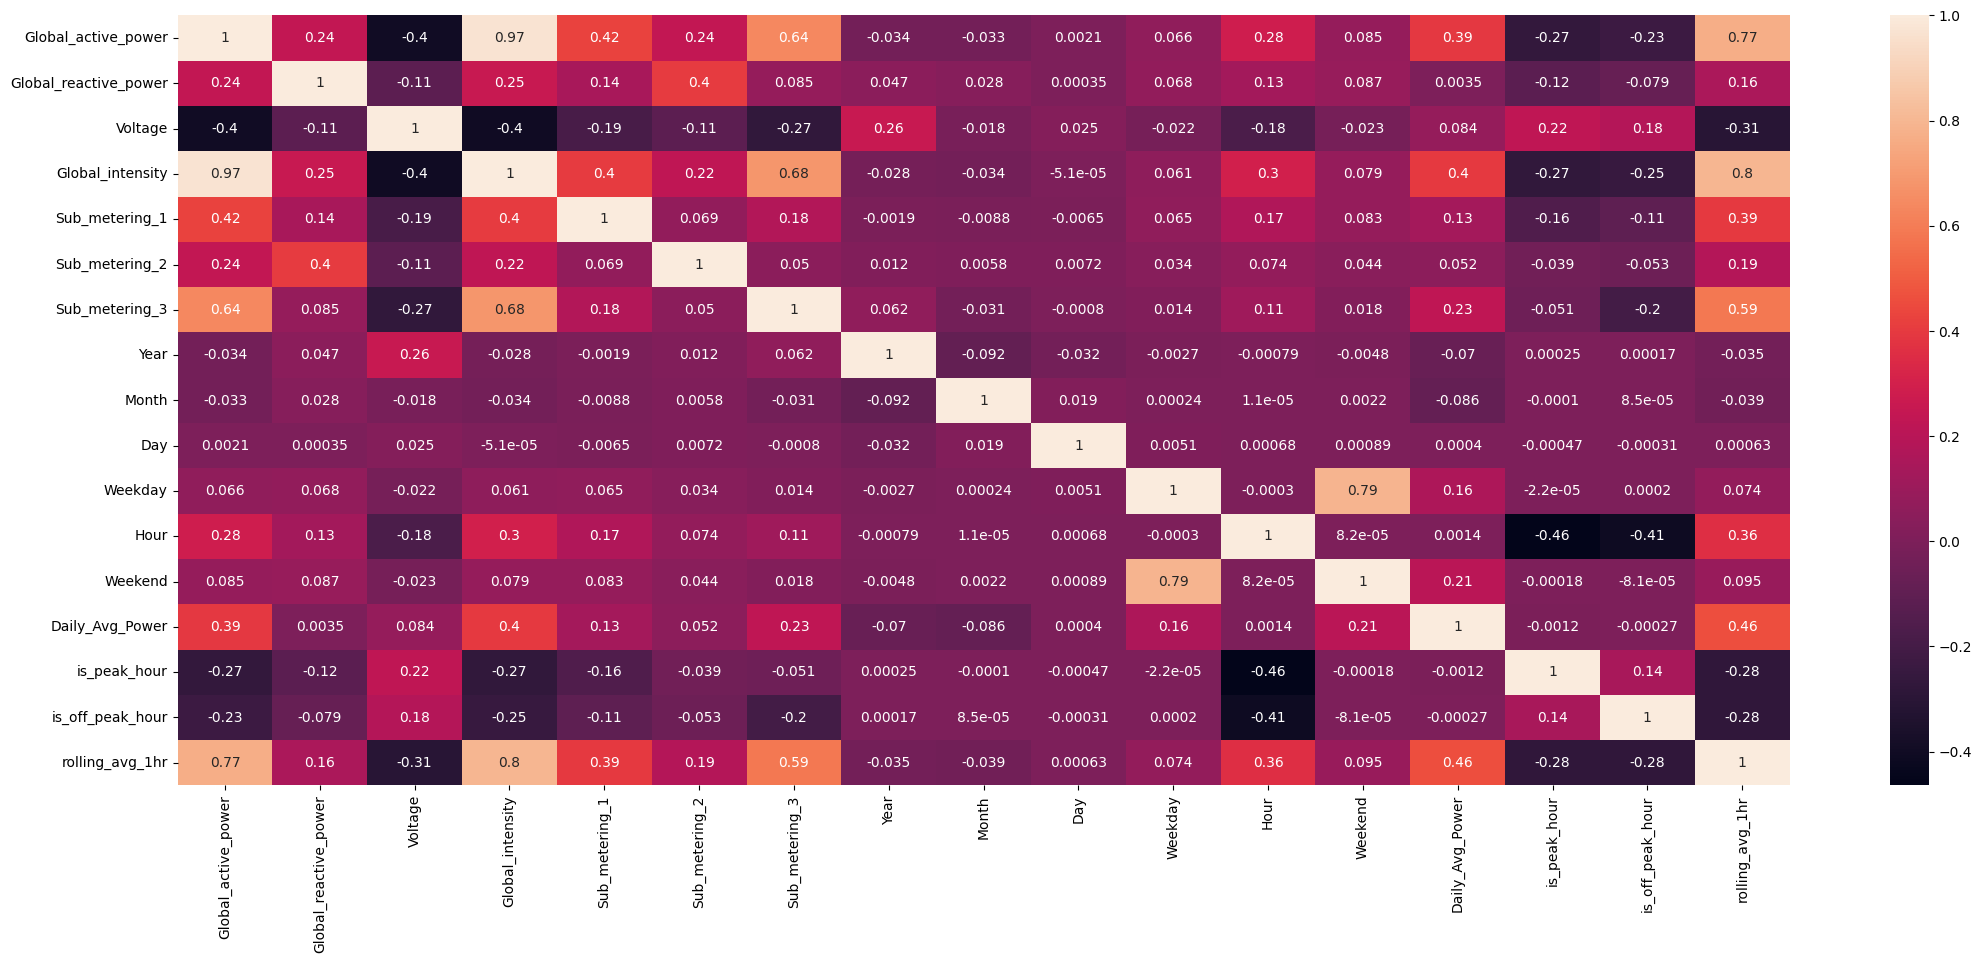

In [47]:
plt.figure(figsize=(26,10)) #type:ignore
sns.heatmap(corr,annot=True) #type:ignore
plt.show() #type:ignore

In [48]:
x=df.iloc[:,1:] #type:ignore
y=df.loc[:,["Global_active_power"]] #type:ignore

In [49]:
import statsmodels.api as sm
X=sm.add_constant(x) #type:ignore
model=sm.OLS(y,X).fit() #type:ignore

print(model.summary())

                             OLS Regression Results                            
Dep. Variable:     Global_active_power   R-squared:                       0.941
Model:                             OLS   Adj. R-squared:                  0.941
Method:                  Least Squares   F-statistic:                 2.055e+06
Date:                 Tue, 27 May 2025   Prob (F-statistic):               0.00
Time:                         11:34:00   Log-Likelihood:            -1.1633e+05
No. Observations:              2049280   AIC:                         2.327e+05
Df Residuals:                  2049263   BIC:                         2.329e+05
Df Model:                           16                                         
Covariance Type:             nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const               

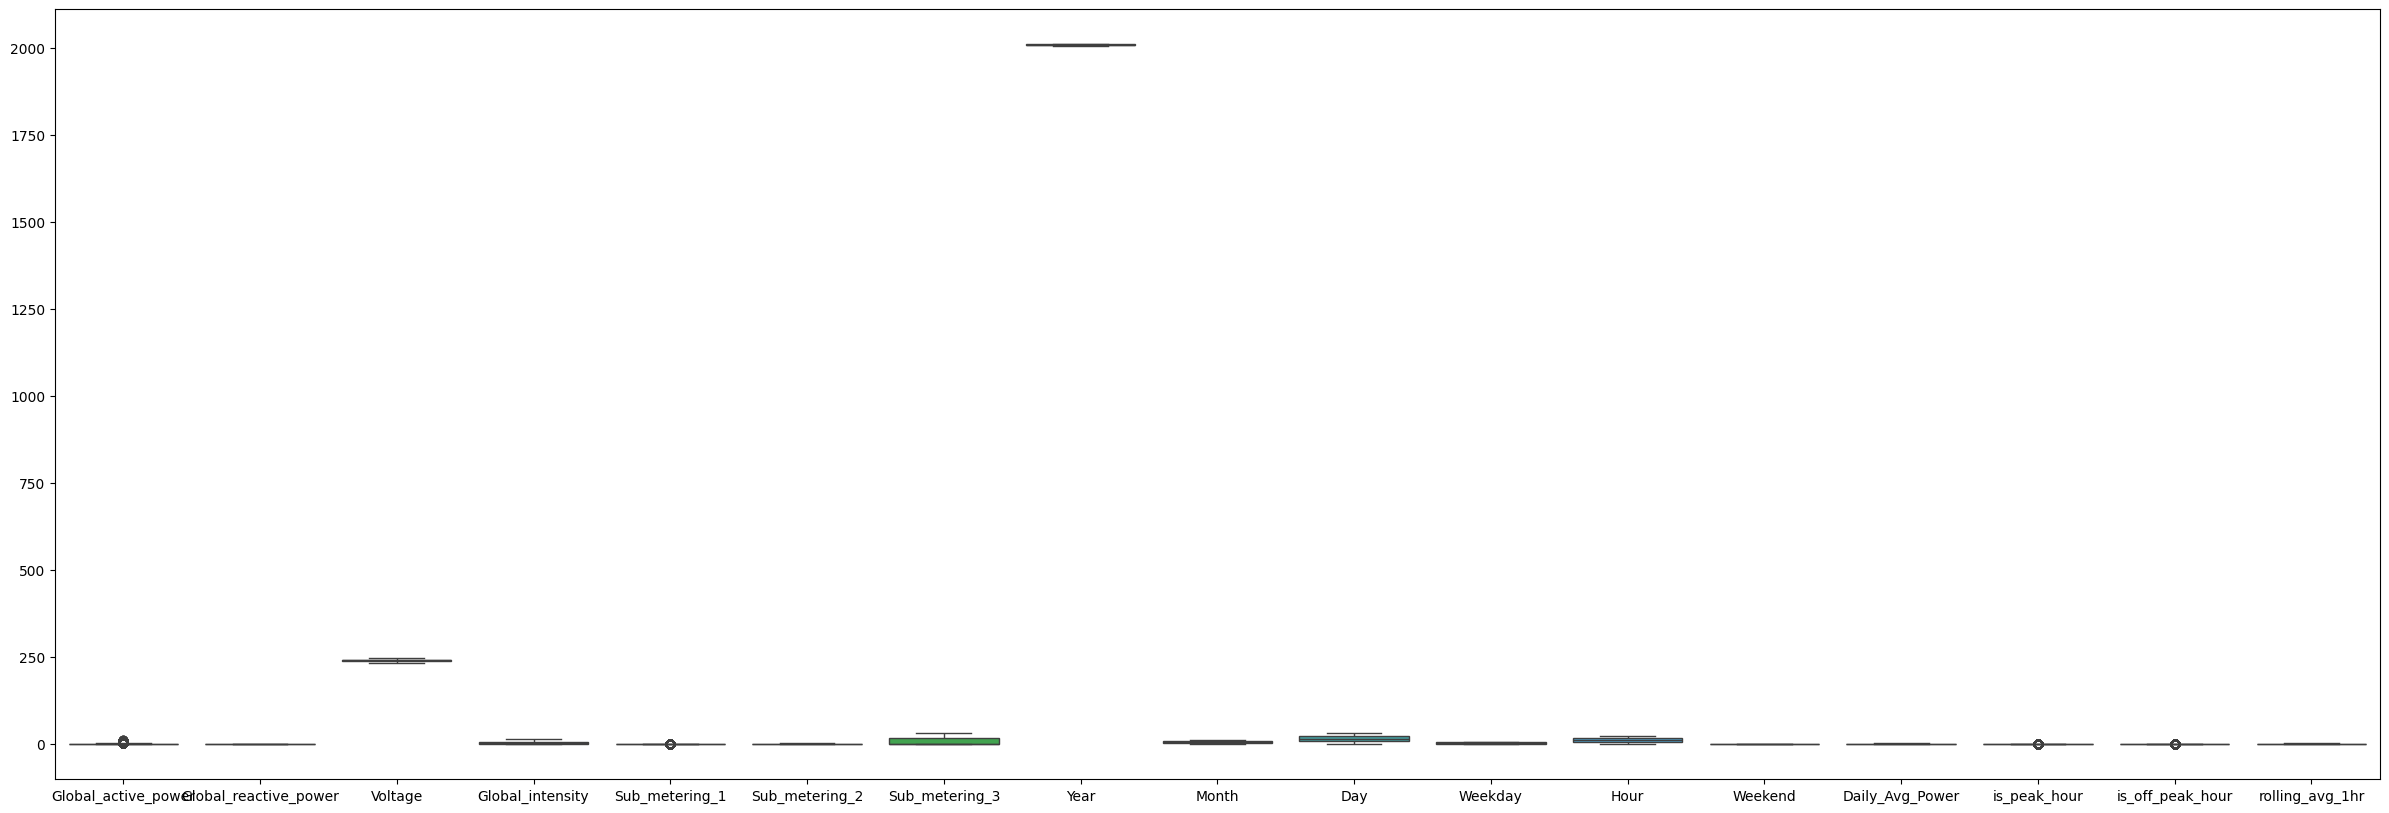

In [50]:
plt.figure(figsize=(30,10)) #type:ignore
sns.boxplot(data=df) #type:ignore
plt.show() #type:ignore

In [51]:
x_=df.drop(["Month","Weekday","Global_active_power"],axis=1) #type:ignore
y_=df.loc[:,["Global_active_power"]] #type:ignore

In [52]:
x_.head() #type:ignore

,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Year,Day,Hour,Weekend,Daily_Avg_Power,is_peak_hour,is_off_peak_hour,rolling_avg_1hr
Datetime,,,,,,,,,,,,,,
2006-12-16 17:24:00,0.413,234.84,13.9,0.0,1.0,17.0,2006,16,17,1,2.074201,1,0,3.4599
2006-12-16 17:25:00,0.413,233.63,13.9,0.0,1.0,16.0,2006,16,17,1,2.074201,1,0,3.4599
2006-12-16 17:26:00,0.413,233.29,13.9,0.0,2.0,17.0,2006,16,17,1,2.074201,1,0,3.4599
2006-12-16 17:27:00,0.413,233.74,13.9,0.0,1.0,17.0,2006,16,17,1,2.074201,1,0,3.4599
2006-12-16 17:28:00,0.413,235.68,13.9,0.0,1.0,17.0,2006,16,17,1,2.074201,1,0,3.4599


In [53]:
y_.head(3) #type:ignore

,Global_active_power
Datetime,
2006-12-16 17:24:00,4.216
2006-12-16 17:25:00,5.360
2006-12-16 17:26:00,5.374


In [54]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
x_norm=scalar.fit_transform(x_)

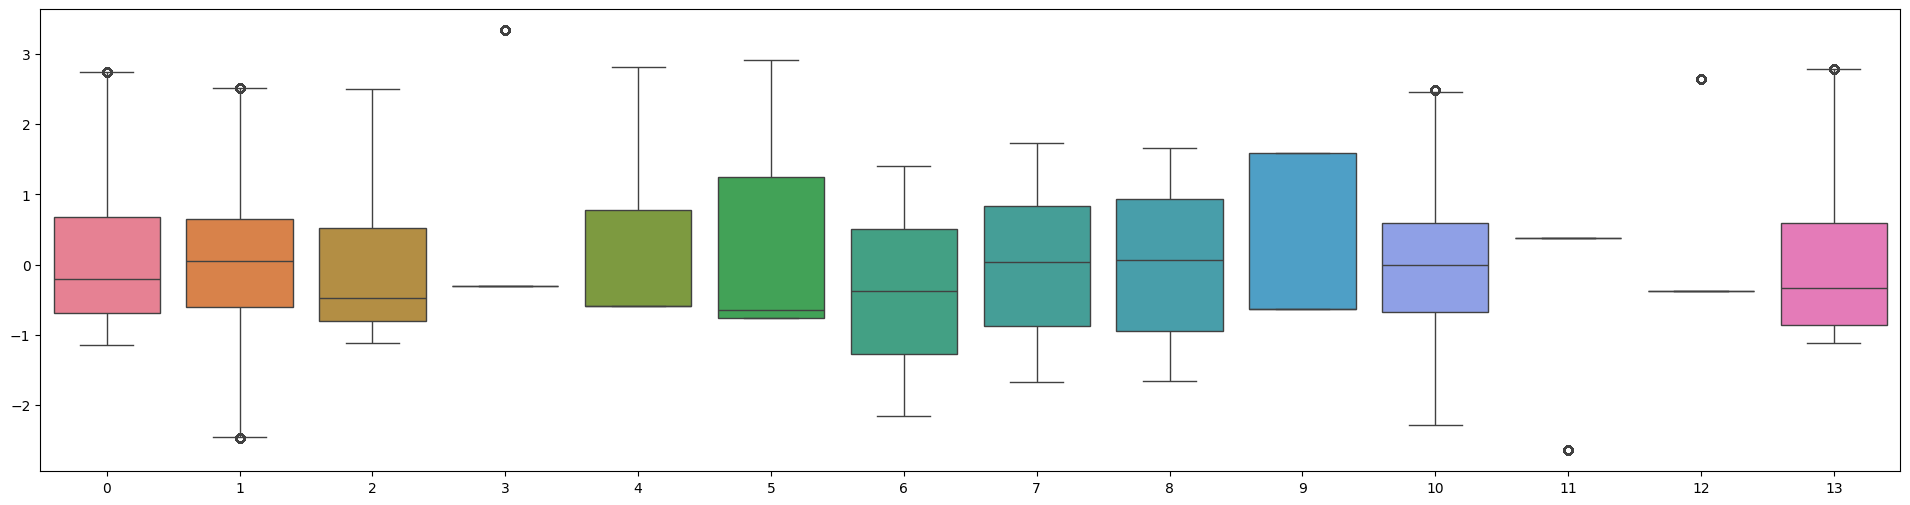

In [55]:
plt.figure(figsize=(24,6)) #type:ignore
sns.boxplot(x_norm) #type:ignore
plt.show() #type:ignore

In [56]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_norm,y,test_size=0.2,random_state=42) #type:ignore

In [57]:
from sklearn.linear_model import LinearRegression
lreg=LinearRegression()
lreg.fit(x_train,y_train) #type:ignore

LinearRegression()

In [58]:
lreg.coef_   #type:ignore

array([[-0.02790169, -0.01201391,  1.0279809 ,  0.04614707,  0.03103231,
        -0.0281315 , -0.00112278,  0.00257222, -0.00575419,  0.00468578,
         0.00987751, -0.00184752,  0.00817823, -0.01203078]])

In [59]:
lreg.intercept_  #type:ignore

array([1.09141447])

In [60]:
y_pred_test_lreg=lreg.predict(x_test)  #type:ignore

In [61]:
y_pred_train_lreg=lreg.predict(x_train)  #type:ignore

In [62]:
train_accuracy=lreg.score(x_train,y_train)
train_accuracy

0.9417095246209513

In [63]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(lreg,x_train,y_train,cv=5)

print(score)
print(f"Mean: {score.mean()}")
print(f"Std. Dev.: {score.std()}")
print("There is no overfitting and underfitting in the dataset.")

[0.94214791 0.94144243 0.94235211 0.94185549 0.94074967]
Mean: 0.9417095224178749
Std. Dev.: 0.000569045113473368
There is no overfitting and underfitting in the dataset.


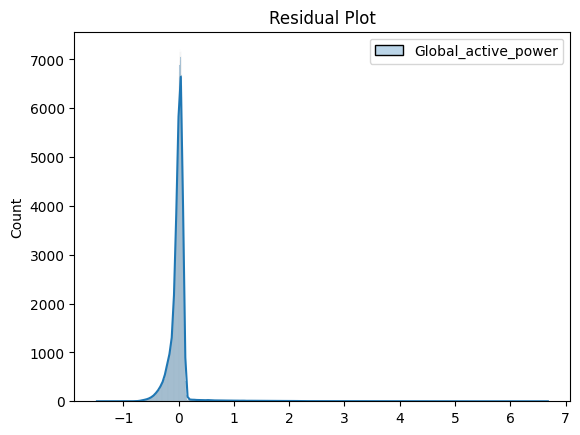

In [64]:
residual1=y_test-y_pred_test_lreg  #type:ignore
sns.histplot(residual1,kde=True,alpha=0.3,fill=True)  #type:ignore
plt.title("Residual Plot")  #type:ignore
plt.show()  #type:ignore

In [65]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
print(r2_score(y_pred_train_lreg,y_train))  #type:ignore
print(mean_absolute_error(y_pred_train_lreg,y_train))  #type:ignore
print(mean_squared_error(y_pred_train_lreg,y_train))  #type:ignore

0.9381014273987394
0.10493334418896819
0.06507269435228705


In [66]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
print(r2_score(y_pred_test_lreg,y_test))  #type:ignore
print(mean_absolute_error(y_pred_test_lreg,y_test))  #type:ignore
print(mean_squared_error(y_pred_test_lreg,y_test))  #type:ignore

0.9356452328045337
0.10528148267997371
0.06766008125924791


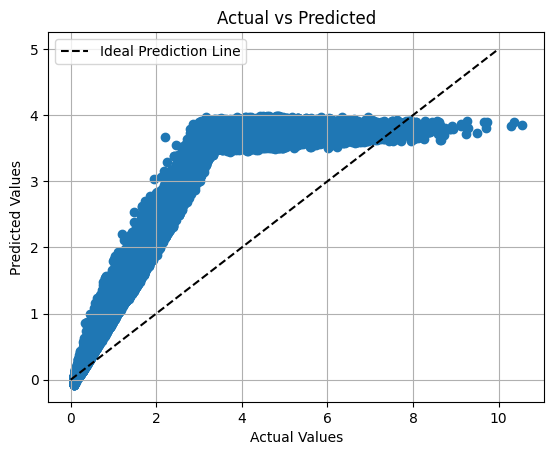

In [67]:
plt.scatter(y_test, y_pred_test_lreg)  #type:ignore
plt.plot([0,10],[0,5],color="black", linestyle="dashed", label="Ideal Prediction Line")  #type:ignore
plt.xlabel("Actual Values")  #type:ignore
plt.ylabel("Predicted Values")  #type:ignore
plt.title("Actual vs Predicted")  #type:ignore
plt.legend()  #type:ignore
plt.grid(True)  #type:ignore
plt.show()  #type:ignore

Decision Tree

In [68]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)  #type:ignore

DecisionTreeRegressor()

In [69]:
y_pred_test_dtr=dtr.predict(x_test)  #type:ignore

In [70]:
y_pred_train_dtr=dtr.predict(x_train)  #type:ignore

In [71]:
train_accuracy=dtr.score(x_train,y_train)
train_accuracy

0.9998075142746828

In [72]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(dtr,x_train,y_train,cv=5)  #type:ignore

print(score)

print(f"Std.Dev:{score.std()}")
print(f"mean:{score.mean()}")

[0.97853897 0.97862692 0.97849443 0.97910372 0.97922596]
Std.Dev:0.0003050024861210668
mean:0.9787979994125184


In [73]:
print(r2_score(y_test,y_pred_test_dtr))  #type:ignore
print(mean_absolute_error(y_test,y_pred_test_dtr))  #type:ignore
print(mean_squared_error(y_test,y_pred_test_dtr))  #type:ignore

0.9803093242090215
0.03164078961206832
0.02213120670968188


In [74]:
print(r2_score(y_train,y_pred_train_dtr))  #type:ignore
print(mean_absolute_error(y_train,y_pred_train_dtr))  #type:ignore
print(mean_squared_error(y_train,y_pred_train_dtr))  #type:ignore

0.9998075142746828
0.00019610470059579533
0.0002148818428618516


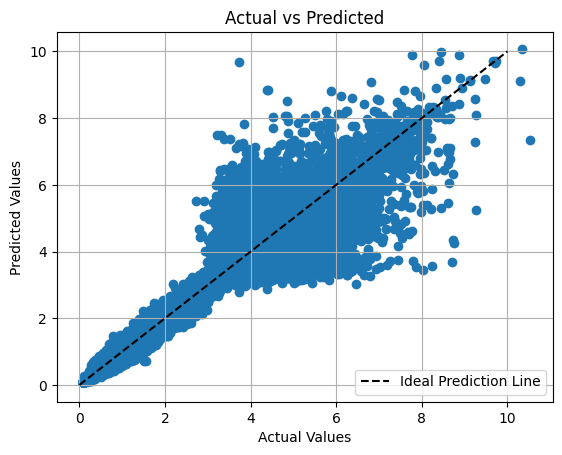

In [75]:
plt.scatter(y_test, y_pred_test_dtr)  #type:ignore
plt.plot([0,10],[0,10],color="black", linestyle="dashed", label="Ideal Prediction Line")  #type:ignore
plt.xlabel("Actual Values")  #type:ignore
plt.ylabel("Predicted Values")  #type:ignore
plt.title("Actual vs Predicted")  #type:ignore
plt.legend()  #type:ignore
plt.grid(True)  #type:ignore
plt.show()  #type:ignore

In [76]:
import pandas as pd
imp=dtr.feature_importances_.tolist()  #type:ignore
col=x_.columns  #type:ignore
new_imp=dict(zip(col,imp))
new_imp1=pd.DataFrame(new_imp,index=["FeatureImportance"]) 
feature_importance=new_imp1.T
FI_map=feature_importance.sort_values(by="FeatureImportance",ascending=False).reset_index()
FI_map


,index,FeatureImportance
0,Global_intensity,0.962840
1,Voltage,0.006715
2,Daily_Avg_Power,0.005623
3,rolling_avg_1hr,0.004976
4,Global_reactive_power,0.004278
5,Hour,0.003534
6,Day,0.003157
7,Sub_metering_1,0.002506
8,Sub_metering_2,0.002491
9,Sub_metering_3,0.001562


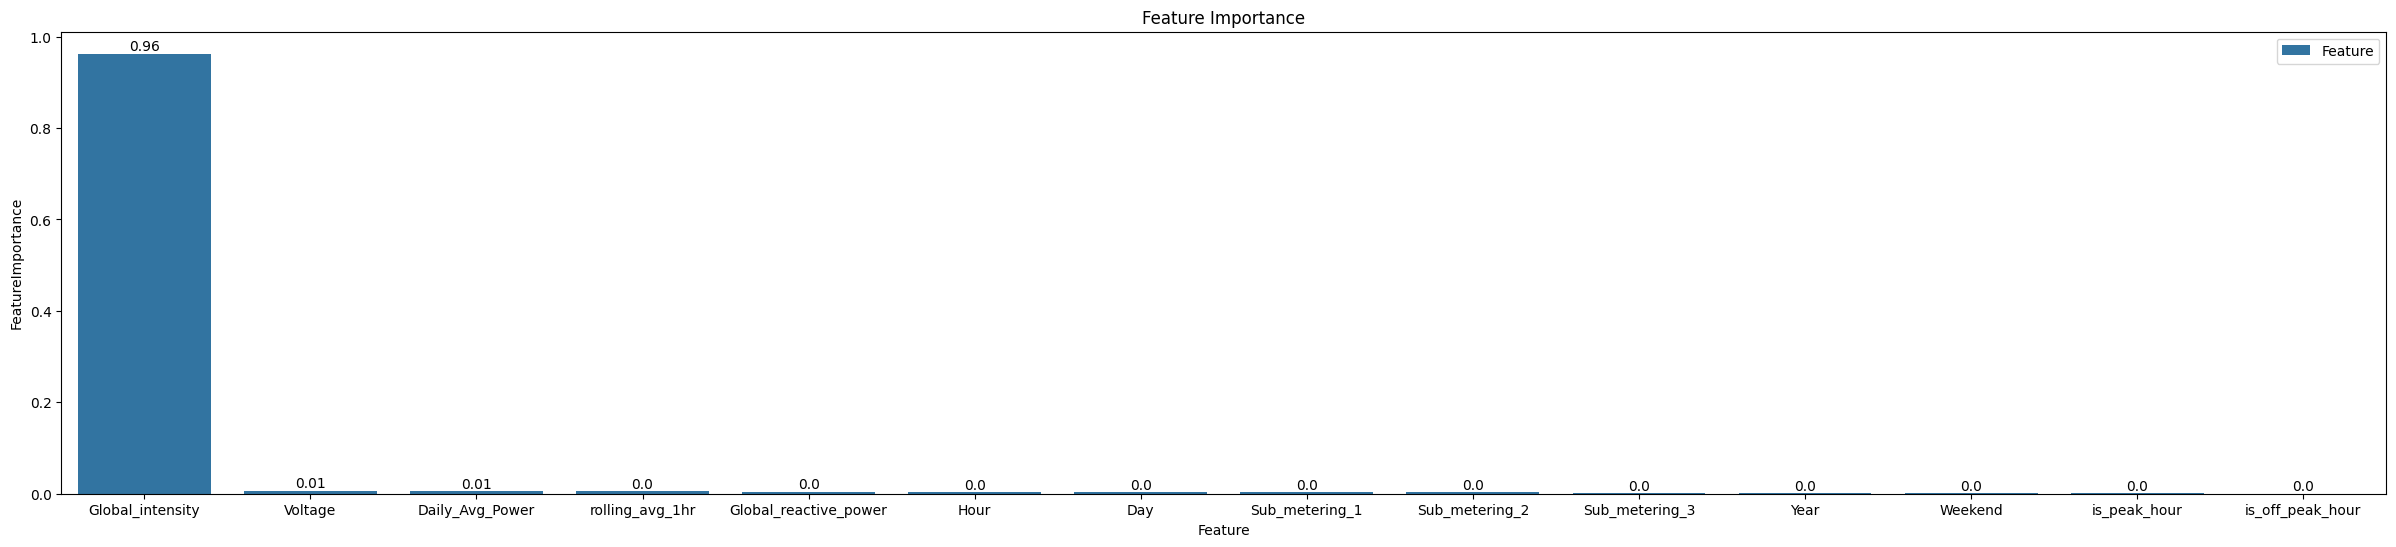

In [ ]:

plt.figure(figsize=(30,6))
bar=sns.barplot(x="index",y="FeatureImportance",data=FI_map,label="Feature")  #type:ignore
for b in bar.patches:
    height=b.get_height()
    plt.text(b.get_x()+b.get_width()/2,height,f"{round(height,2)}",ha="center",va="bottom")
plt.title("Feature Importance")
plt.xlabel("Feature")
plt.show()

RandomForest

In [78]:
from sklearn.ensemble import RandomForestRegressor
rfg=RandomForestRegressor(n_estimators=50,n_jobs=-1,random_state=42)
rfg.fit(x_train,y_train)

RandomForestRegressor(n_estimators=50, n_jobs=-1, random_state=42)

In [84]:
train_accuracy_rfg=rfg.score(x_train,y_train)
train_accuracy_rfg

0.998329508716789

In [79]:
y_pred_test_rfg=rfg.predict(x_test)

In [80]:
y_pred_train_rfg=rfg.predict(x_train)

In [81]:
print(r2_score(y_train,y_pred_train_rfg))
print(mean_absolute_error(y_train,y_pred_train_rfg))
print(mean_squared_error(y_train,y_pred_train_rfg))

0.998329508716789
0.009707629099318224
0.0018648564449624335


In [82]:
print(r2_score(y_test,y_pred_test_rfg))
print(mean_absolute_error(y_test,y_pred_test_rfg))
print(mean_squared_error(y_test,y_pred_test_rfg))

0.9893345627001932
0.02566765874313353
0.0119873487348423


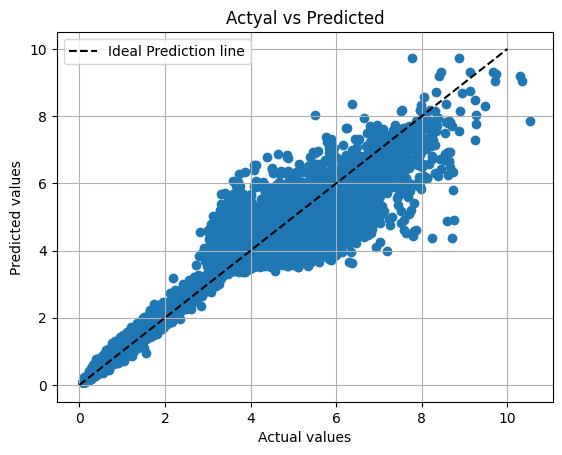

In [88]:
plt.scatter(y_test,y_pred_test_rfg)
plt.plot([0,10],[0,10],linestyle="dashed",color="black",label="Ideal Prediction line")
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Actyal vs Predicted")
plt.legend()
plt.grid(True)
plt.show()

In [131]:
feature_importance=rfg.feature_importances_
feature_importance_df=pd.DataFrame(feature_importance,index=x_.columns,columns=["FeatureImportance"])
feature_importance_df.sort_values(by="FeatureImportance",ascending=False).head(3)
print("Global_intensity has high feature importance ampong all features.")

Global_intensity has high feature importance ampong all features.


Gradient Booster

In [106]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor(n_estimators=100,learning_rate=0.1,random_state=42)
gbr.fit(x_train,y_train)

GradientBoostingRegressor(random_state=42)

In [107]:
gbr_train_accuracy=gbr.score(x_train,y_train)
gbr_train_accuracy

0.9733996607797644

In [108]:
y_pred_train_gbr=gbr.predict(x_train)

In [109]:
y_pred_test_gbr=gbr.predict(x_test)

In [110]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print(r2_score(y_train,y_pred_train_gbr))
print(mean_squared_error(y_train,y_pred_train_gbr))
print(mean_absolute_error(y_train,y_pred_train_gbr))

0.9733996607797644
0.02969534443645497
0.050874917197465244


In [111]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print(r2_score(y_test,y_pred_test_gbr))
print(mean_squared_error(y_test,y_pred_test_gbr))
print(mean_absolute_error(y_test,y_pred_test_gbr))

0.9724058169499514
0.031014302177745395
0.05115640376593022


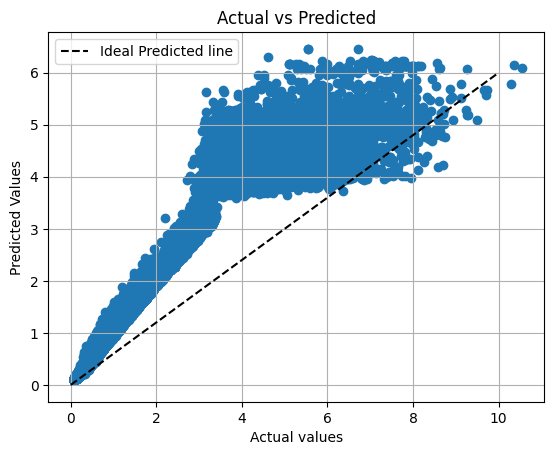

In [129]:
plt.scatter(y_test,y_pred_test_gbr)
plt.plot([0,10],[0,6],label="Ideal Predicted line",linestyle="dashed",color="black")
plt.xlabel("Actual values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted")
plt.legend()
plt.grid(True)
plt.show()

Xgboost 

In [113]:
from xgboost import XGBRegressor
xgb=XGBRegressor()
xgb.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [115]:
xgb_train_accuracy=xgb.score(x_train,y_train)
xgb_train_accuracy

0.9830711483955383

In [126]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(xgb,x_train,y_train,cv=5)

print(score)
print(f"Mean: {score.mean()}")
print(f"std.dev.: {score.std()}")

[0.98149365 0.98114294 0.98177046 0.98138231 0.98086053]
Mean: 0.9813299775123596
std.dev.: 0.0003094875199786159


In [116]:
y_pred_test_xgb=xgb.predict(x_test)

In [117]:
y_pred_train_xgb=xgb.predict(x_train)

In [122]:
print(r2_score(y_train,y_pred_train_xgb))
print(mean_absolute_error(y_train,y_pred_train_xgb))
print(mean_squared_error(y_train,y_pred_train_xgb))

0.9830711483955383
0.04001178964972496
0.018898531794548035


In [123]:
print(r2_score(y_test,y_pred_test_xgb))
print(mean_absolute_error(y_test,y_pred_test_xgb))
print(mean_squared_error(y_test,y_pred_test_xgb))

0.9811030626296997
0.041230667382478714
0.02123912237584591


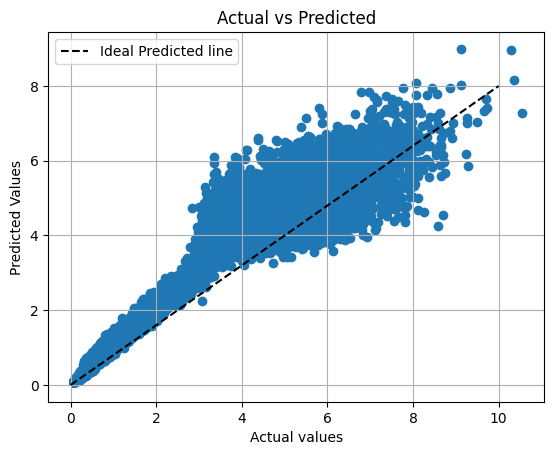

In [130]:
plt.scatter(y_test,y_pred_test_xgb)
plt.plot([0,10],[0,8],label="Ideal Predicted line",linestyle="dashed",color="black")
plt.xlabel("Actual values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted")
plt.legend()
plt.grid(True)
plt.show()

Comparison 

In [153]:
r2_score_df=pd.DataFrame({"Linear Regression":r2_score(y_test,y_pred_test_lreg),
                          "Decision Tree Regression":r2_score(y_test,y_pred_test_dtr),
                          "Random Forest Regression":r2_score(y_test,y_pred_test_rfg),
                          "Gradient Boosting Regression":r2_score(y_test,y_pred_test_gbr),
                          "Extreme Gradient Boosting Regression":r2_score(y_test,y_pred_test_xgb)},index=["r2_score"])
r2_score_df_df=r2_score_df.T.reset_index()
r2_score_df_df["Model"]=r2_score_df_df["index"]
r2_score_df_df.drop(["index"],axis=1,inplace=True)
r2_score_df_df

,r2_score,Model
0,0.939801,Linear Regression
1,0.980309,Decision Tree Regression
2,0.989335,Random Forest Regression
3,0.972406,Gradient Boosting Regression
4,0.981103,Extreme Gradient Boosting Regression


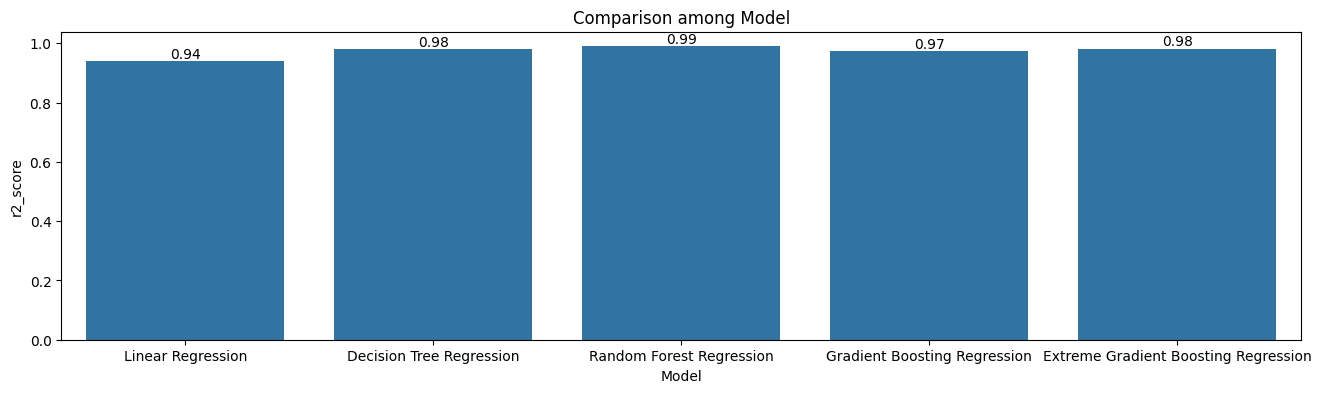

Random Forest Regressor with r2score as 0.99 works well.


In [165]:
plt.figure(figsize=(16,4))
bar=sns.barplot(x="Model",y="r2_score",data=r2_score_df_df)
for i in bar.patches:
    height=i.get_height()
    plt.text(i.get_x()+i.get_width()/2,height,f"{round(height,2)}",ha="center",va="bottom")
plt.title("Comparison among Model")
plt.show()
print("Random Forest Regressor with r2score as 0.99 works well.")